In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Part 1 ‑ Exploratory data analysis</h2>

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [241]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [242]:
logins.login_time.sort_values()

6       1970-01-01 20:12:16
0       1970-01-01 20:13:18
1       1970-01-01 20:16:10
3       1970-01-01 20:16:36
2       1970-01-01 20:16:37
                ...        
93136   1970-04-13 18:48:52
93137   1970-04-13 18:50:19
93139   1970-04-13 18:54:02
93141   1970-04-13 18:54:23
93140   1970-04-13 18:57:38
Name: login_time, Length: 93142, dtype: datetime64[ns]

**Aggregate login counts based on 15-minute time intervals**

In [243]:
logins = logins.resample('15min', on='login_time').count().rename(columns={'login_time': 'login_count'})
logins.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [244]:
logins['month'] = logins.index.month
logins['rolling_4'] = logins['login_count'].rolling(window=4, center=False).mean()
logins['rolling_12'] = logins['login_count'].rolling(window=12, center=False).mean()
logins['rolling_16'] = logins['login_count'].rolling(window=16, center=False).mean()
logins['diff'] = logins['login_count'].diff()
logins.head()

,login_count,month,rolling_4,rolling_12,rolling_16,diff
login_time,,,,,,
1970-01-01 20:00:00,2,1,NaN,NaN,NaN,NaN
1970-01-01 20:15:00,6,1,NaN,NaN,NaN,4.0
1970-01-01 20:30:00,9,1,NaN,NaN,NaN,3.0
1970-01-01 20:45:00,7,1,6.00,NaN,NaN,-2.0
1970-01-01 21:00:00,1,1,5.75,NaN,NaN,-6.0


Text(0, 0.5, 'Noise')

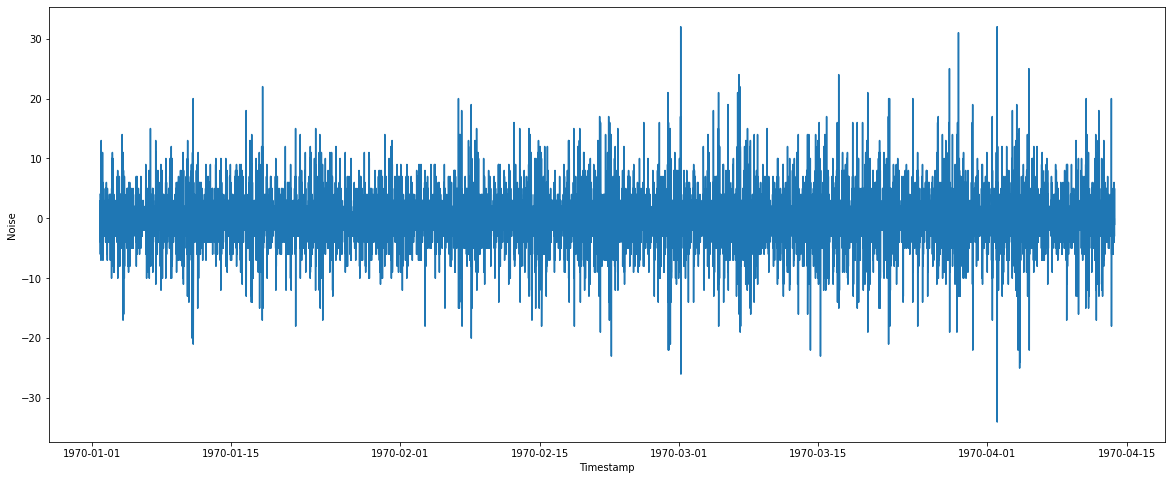

In [245]:
plt.figure(figsize=(20,8))
plt.plot(logins.index, logins['diff'])
plt.xlabel('Timestamp')
plt.ylabel('Noise')

In [266]:
jan = logins[logins.month == 1]
feb = logins[logins.month == 2]
mar = logins[logins.month == 3]
apr = logins[logins.month == 4]

jan.head(20)

,login_count,month,rolling_4,rolling_12,rolling_16,diff
login_time,,,,,,
1970-01-01 20:00:00,2,1,NaN,NaN,NaN,NaN
1970-01-01 20:15:00,6,1,NaN,NaN,NaN,4.0
1970-01-01 20:30:00,9,1,NaN,NaN,NaN,3.0
1970-01-01 20:45:00,7,1,6.00,NaN,NaN,-2.0
1970-01-01 21:00:00,1,1,5.75,NaN,NaN,-6.0
1970-01-01 21:15:00,4,1,5.25,NaN,NaN,3.0
1970-01-01 21:30:00,0,1,3.00,NaN,NaN,-4.0
1970-01-01 21:45:00,4,1,2.25,NaN,NaN,4.0
1970-01-01 22:00:00,9,1,4.25,NaN,NaN,5.0


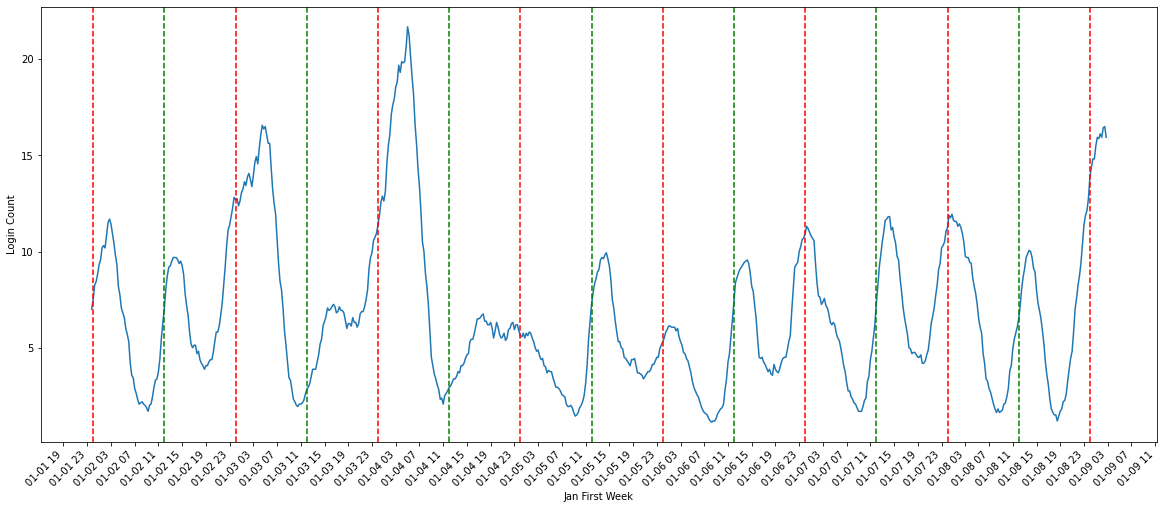

In [347]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import datetime as dt

plt.figure(figsize=(20,8))
plt.plot(jan.index[:700], jan['rolling_16'][:700])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Jan First Week')
plt.ylabel('Login Count')

date_list = [dt.datetime(1970,1,2) + dt.timedelta(days=x) for x in range(8)]
noon_list = [dt.datetime(1970,1,2,12) + dt.timedelta(days=x) for x in range(7)]

for date in date_list:
    plt.axvline(date, color='r', linestyle='--')
    
for date in noon_list:
    plt.axvline(date, color='g', linestyle='--')
    
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))

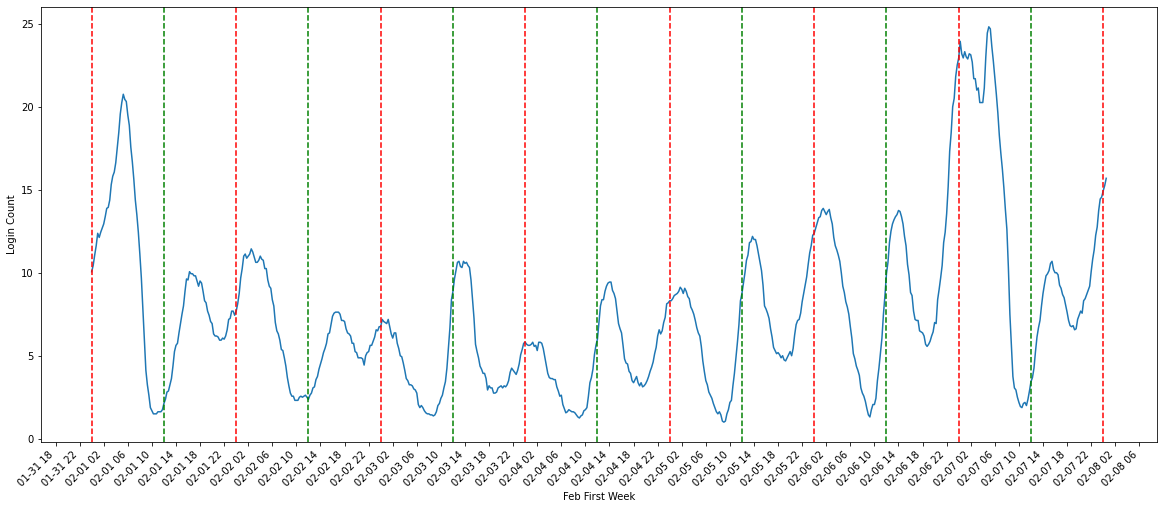

In [346]:
plt.figure(figsize=(20,8))
plt.plot(feb.index[:675], feb['rolling_16'][:675])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feb First Week')
plt.ylabel('Login Count')

date_list = [dt.datetime(1970,2,1) + dt.timedelta(days=x) for x in range(8)]
noon_list = [dt.datetime(1970,2,1,12) + dt.timedelta(days=x) for x in range(7)]

for date in date_list:
    plt.axvline(date, color='r', linestyle='--')

for date in noon_list:
    plt.axvline(date, color='g', linestyle='--')
    
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))

We can see from the plot that there is a clear daily cycle for the demand. Logins tend to reach to a peak 12-4am, then drop drastically and reach another peak at around 2-4pm.<br><br>
One potential issue is that the data could be missing the time zone information. The two-peak patern could be explained by users commute between work and home if the peaks are 5-9am and 7-9pm.

<h2>Part 2 ‑ Experiment and metrics design</h2>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.<br><br>

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?<br>
<span style='color:blue'>I would choose the percentage of drivers that serve both cities as the key measure of success.</span><br><br>

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:<br><br>
    a. how you will implement the experiment<br>
    <span style='color:blue'>I would run an A/B test to randomly split the drivers into two groups, one control group with no change on the app, and one treatment group with the offer to reimburse all toll costs.</span><br><br>

    b. what statistical test(s) you will conduct to verify the significance of the observation<br>
    <span style='color:blue'>The percentage of drivers serving both cities for the control group: p<sub>C</sub><br>
    The percentage of drivers serving both cities for the treatment group: p<sub>T</sub></span><br>
    
    <span style='color:blue'>Null hypothesis: p<sub>C</sub> - p<sub>T</sub> = 0<br>
    Alternative hypothesis: p<sub>C</sub> - p<sub>T</sub> < 0</span><br>
    
    <span style='color:blue'>Then calculate the pooled p, and the standard error of the samping distribution of p<sub>C</sub> - p<sub>T</sub>.</span>
    
    <span style='color:blue'>Then calculate the z statistic, and use the one-tailed z-table to get the p-value for the area to the left of the z score.</span><br>

    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.<br>
    <span style='color:blue'>We will use confidence level 95% for the test.<br><br>
    If the p-value is smaller than 0.05, then we can state that with 95% confidence, the control group has a lower percentage of drivers serving both cities than the treatment group, which means the reimbursement offer successfully encouraged driver partners to be available in both cities. I would recommend the operation team to make the offer available to all drivers.<br><br>
    If the p-value is larger than 0.05, then the reimbursement offer did not encourage the drivers to be available in both cities. In this case, I would not recommend the operation team to implement this change.</span>

<h2>Part 3 ‑ Predictive modeling</h2>

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.<br><br>
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.<br><br>
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.<br>
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm rider retention (again, a few sentences will suffice).

**Data description**<br>
● city: city this user signed up in<br>
● phone: primary device for this user<br>
● signup_date: date of account registration; in the form ‘YYYY MM DD’<br>
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’<br>
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
● surge_pct: the percent of trips taken with surge multiplier > 1<br>
● avg_surge: The average surge multiplier over all of this user’s trips<br>
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up<br>
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise<br>
● weekday_pct: the percent of the user’s trips occurring during a weekday

<h2>1. Data Wrangling and EDA</h2>

In [56]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [68]:
# convert signup date and last trip date columns into datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

<h3>Null Values</h3>

In [80]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

We will fill the missing values for avg_rating_of_driver and avg_rating_by_driver with their means, and phone with unknown

In [144]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=df['avg_rating_of_driver'].mean())
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=df['avg_rating_by_driver'].mean())
df['phone'] = df['phone'].fillna(value='unkown')

In [145]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

<h3>Outliers</h3>

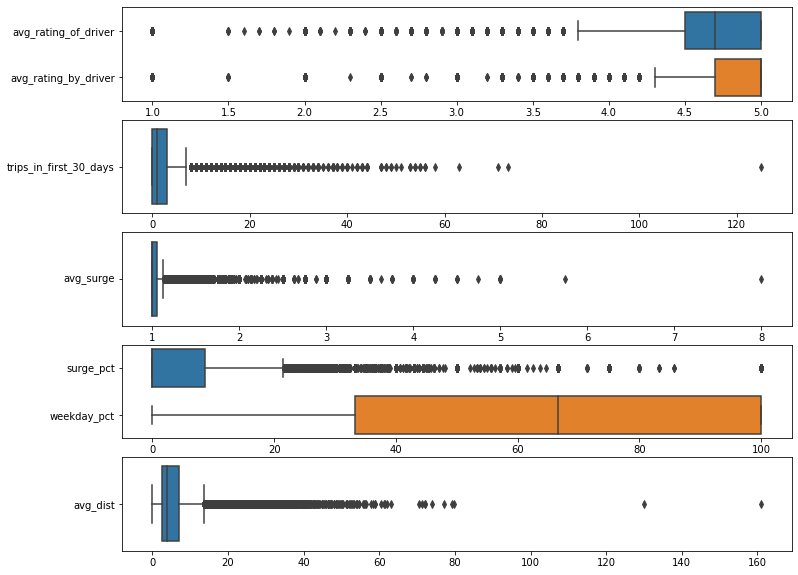

In [146]:
fig, axes = plt.subplots(5, 1, figsize=(12,10))
sns.boxplot(ax=axes[0], data=df[['avg_rating_of_driver', 'avg_rating_by_driver']], orient='h')
sns.boxplot(ax=axes[1], data=df[['trips_in_first_30_days']], orient='h')
sns.boxplot(ax=axes[2], data=df[['avg_surge']], orient='h')
sns.boxplot(ax=axes[3], data=df[['surge_pct', 'weekday_pct']], orient='h')
sns.boxplot(ax=axes[4], data=df[['avg_dist']], orient='h')

From the boxplots we can see that there are some outliers in the data and we should evaluate them and handle accordingly.

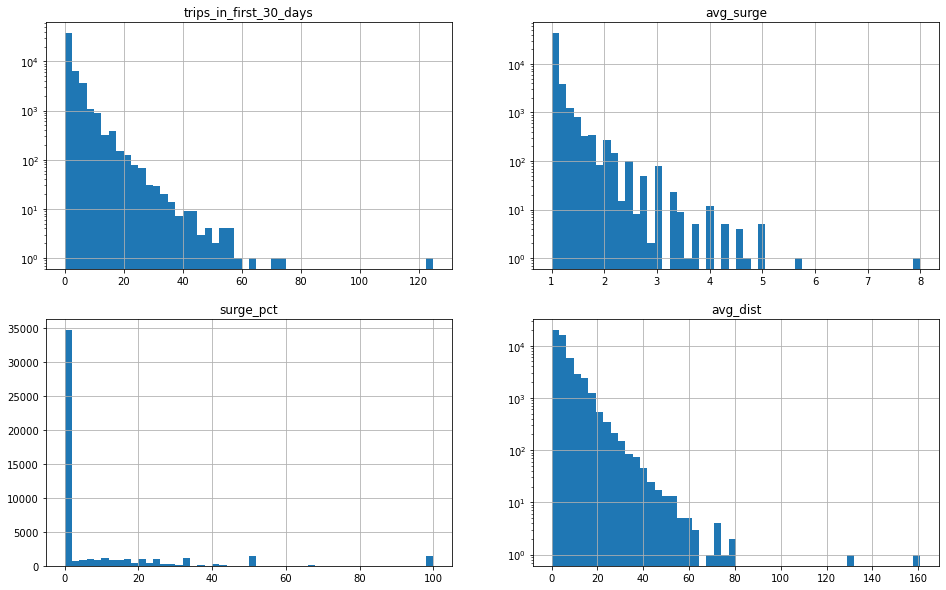

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))

df['trips_in_first_30_days'].hist(bins=50, ax=axes[0,0])
axes[0,0].set_title('trips_in_first_30_days')
axes[0,0].set_yscale('log')

df['avg_surge'].hist(bins=50, ax=axes[0,1])
axes[0,1].set_title('avg_surge')
axes[0,1].set_yscale('log')

df['surge_pct'].hist(bins=50, ax=axes[1,0])
axes[1,0].set_title('surge_pct')
# axes[1,0].set_yscale('log')

df['avg_dist'].hist(bins=50, ax=axes[1,1])
axes[1,1].set_title('avg_dist')
axes[1,1].set_yscale('log')

In [211]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [213]:
lowerbound, upperbound = outlier_treatment(df['trips_in_first_30_days'])
df[(df['trips_in_first_30_days'] < lowerbound) | (df['trips_in_first_30_days'] > upperbound)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
38,King's Landing,24,2014-01-22,4.9,1.04,2014-06-30,iPhone,5.8,True,61.6,4.69,4.8,1
86,King's Landing,9,2014-01-20,4.7,1.17,2014-05-25,iPhone,25.0,True,66.7,3.55,4.9,0
96,Winterfell,11,2014-01-26,4.1,1.00,2014-07-01,iPhone,1.9,True,76.9,4.89,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,Winterfell,12,2014-01-23,4.2,1.02,2014-04-03,iPhone,3.3,False,70.0,1.87,4.5,0
49948,Astapor,10,2014-01-25,4.9,1.01,2014-05-19,iPhone,4.3,False,87.0,3.30,5.0,0
49958,Astapor,9,2014-01-30,4.0,1.00,2014-05-31,Android,0.0,False,76.9,1.45,4.7,0
49964,Winterfell,8,2014-01-24,4.5,1.04,2014-06-26,iPhone,3.8,False,57.7,4.80,4.6,1


Using interquartile range would reselt in removing too many data points. We will simply remove data points with trips_in_first_30_days higher than 60 since it's highly unlikely and the associated accounts could be test accounts.

In [216]:
df = df[df['trips_in_first_30_days'] <= 60]
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [306]:
df.shape

(49996, 14)

<h3>Retained Users</h3>

In [71]:
df.last_trip_date.sort_values()

31425   2014-01-01
10729   2014-01-01
40336   2014-01-01
34828   2014-01-01
37295   2014-01-01
           ...    
45126   2014-07-01
38651   2014-07-01
14473   2014-07-01
22735   2014-07-01
45357   2014-07-01
Name: last_trip_date, Length: 50000, dtype: datetime64[ns]

Since the latest last trip date is 2014-07-01, we will assume the data was pulled on that date. All users with a last trip date within the preceding 30 days are considered retained.

In [79]:
from datetime import datetime, timedelta

retain_window = max(df.last_trip_date) - timedelta(days=30)

df['retained'] = [1 if last_date > retain_window else 0 for last_date in df.last_trip_date]
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


<h3>Categorical Data</h3>

C:\Users\Billy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Billy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Billy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Billy\anaconda3\lib\site-packages\pandas\plotting\_matpl

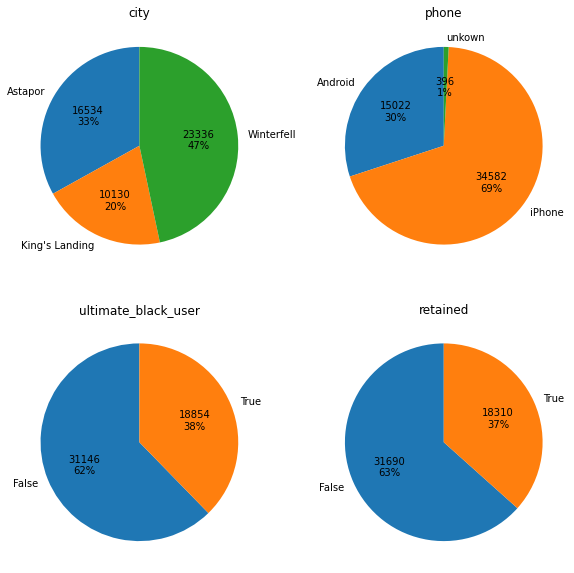

In [147]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, axes = plt.subplots(2, 2, figsize=(10,10))

df.groupby('city').size().plot(kind='pie', autopct=label_function, ax=axes[0,0], startangle=90)
axes[0,0].set_title('city')
axes[0,0].yaxis.set_visible(False)

df.groupby('phone').size().plot(kind='pie', autopct=label_function, ax=axes[0,1], startangle=90)
axes[0,1].set_title('phone')
axes[0,1].yaxis.set_visible(False)

df.groupby('ultimate_black_user').size().plot(kind='pie', autopct=label_function, ax=axes[1,0], startangle=90)
axes[1,0].set_title('ultimate_black_user')
axes[1,0].yaxis.set_visible(False)

df.groupby('retained').size().plot(kind='pie', autopct=label_function, labels=['False','True'], ax=axes[1,1], startangle=90)
axes[1,1].set_title('retained')
axes[1,1].yaxis.set_visible(False)

We can see from the pie charts that:
1. users are coming from three cities, and the majority of the users are from Winterfell
2. Majority of the users use an android device
3. Majority of the users did not take an Ultimate Black in their first 30 days
4. **Ultimate has retined 37% of their users in their 6th month on the system**

<h2>2. Model to Predict Retention</h2>

In [217]:
df['signup_weekday'] = df['signup_date'].dt.dayofweek
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,signup_weekday
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,5
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,2
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,4
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0


In [218]:
X = pd.get_dummies(df.drop(['retained', 'signup_date', 'last_trip_date'], axis=1),
                   columns=['city', 'phone', 'ultimate_black_user', 'signup_weekday'],
                   drop_first=True)
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,phone_unkown,ultimate_black_user_True,signup_weekday_1,signup_weekday_2,signup_weekday_3,signup_weekday_4,signup_weekday_5,signup_weekday_6
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,1,0,0,0,0,1,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,0,0,1,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0,0,0,0,0,0,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,1,0,0,0,1,0,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0,0,0,0,0,0,0,0


In [219]:
y = df['retained']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: retained, dtype: int64

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Feature standardization**

In [222]:
from sklearn.preprocessing import StandardScaler

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,phone_unkown,ultimate_black_user_True,signup_weekday_1,signup_weekday_2,signup_weekday_3,signup_weekday_4,signup_weekday_5,signup_weekday_6
0,-0.341799,0.704946,1.358904,2.041302,-0.291677,0.389825,-0.624093,-0.500358,1.067420,0.667938,-0.0916,-0.779568,-0.335418,-0.391027,-0.404162,2.032820,-0.490631,-0.384520
1,-0.607161,0.704946,0.243513,2.041302,-1.639987,-0.807692,-1.748488,-0.500358,1.067420,0.667938,-0.0916,-0.779568,-0.335418,-0.391027,-0.404162,-0.491927,2.038192,-0.384520
2,-0.341799,0.704946,-0.336491,-0.444240,-0.291677,0.688764,-2.872883,-0.500358,1.067420,-1.497145,-0.0916,1.282762,-0.335418,-0.391027,-0.404162,-0.491927,-0.490631,2.600645
3,-0.607161,0.704946,-0.336491,-0.444240,-0.291677,0.650078,-0.624093,-0.500358,-0.936839,0.667938,-0.0916,-0.779568,-0.335418,-0.391027,2.474255,-0.491927,-0.490631,-0.384520
4,-0.607161,0.704946,-0.336491,-0.444240,-1.639987,-0.283668,-1.748488,-0.500358,1.067420,0.667938,-0.0916,1.282762,-0.335418,2.557365,-0.404162,-0.491927,-0.490631,-0.384520


In [223]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns
X_test_scaled.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,phone_unkown,ultimate_black_user_True,signup_weekday_1,signup_weekday_2,signup_weekday_3,signup_weekday_4,signup_weekday_5,signup_weekday_6
0,1.250372,-0.007448,0.065050,0.460497,-0.658418,-0.334664,0.050545,-0.500358,1.067420,0.667938,-0.0916,-0.779568,-0.335418,-0.391027,-0.404162,2.032820,-0.490631,-0.384520
1,-0.076437,-1.076039,-0.336491,-0.444240,-0.291677,2.524605,0.500303,-0.500358,1.067420,0.667938,-0.0916,-0.779568,-0.335418,-0.391027,-0.404162,-0.491927,-0.490631,2.600645
2,-0.607161,-0.004671,-0.336491,-0.444240,-1.639987,4.281314,0.500303,-0.500358,1.067420,-1.497145,-0.0916,-0.779568,-0.335418,2.557365,-0.404162,-0.491927,-0.490631,-0.384520
3,-0.076437,0.704946,-0.336491,-0.444240,-0.291677,2.477126,0.500303,-0.500358,-0.936839,0.667938,-0.0916,-0.779568,-0.335418,-0.391027,2.474255,-0.491927,-0.490631,-0.384520
4,-0.341799,0.704946,-0.336491,-0.444240,1.056633,0.092644,0.500303,1.998568,-0.936839,-1.497145,-0.0916,-0.779568,-0.335418,2.557365,-0.404162,-0.491927,-0.490631,-0.384520


**Logistic Regression**

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") 

lr = LogisticRegression(max_iter=1000,random_state=0)
param_distributions = {
                        'C': [0.01,0.1,1,10,100],
                        'penalty': ['l1','l2'],
                        'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}
search = RandomizedSearchCV(lr,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    4.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished


{'solver': 'liblinear', 'penalty': 'l1', 'C': 1}

**K-Nearest Neighbors (KNN)**

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_distributions = {
                        'n_neighbors': list(range(1,21,2)),
                        'weights': ['uniform','distance'],
                        'metric': ['euclidean','manhattan','minkowski']
}
search = RandomizedSearchCV(knn,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   54.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.7s finished


{'weights': 'uniform', 'n_neighbors': 15, 'metric': 'manhattan'}

**Support Vector Machine (SVM)**

In [229]:
from sklearn.svm import SVC

svc = SVC(probability=True)
param_distributions = {
                        'C': [0.1, 1, 10, 100],
                        'kernel': ['linear','poly','rbf','sigmoid'],
                        'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]
}
search = RandomizedSearchCV(svc,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed: 230.8min remaining: 25.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 424.7min finished


{'kernel': 'poly', 'gamma': 0.1, 'C': 100}

**Gradient Boost - XGBoost**

In [230]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
param_distributions = {
                        'learning_rate': [0.001,0.01,0.1],
                        'max_depth': [2,5,10,20],  
                        'gamma': [0.05,0.1,0.5,1],
                        'reg_lambda': [0.01,0.1,1],
                        'reg_alpha': [0,0.1,0.5,1],
                        'subsample': [0.6,0.8,1],
                        'colsample_bytree': [0.6,0.8,1]
}
search = RandomizedSearchCV(xgb,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   15.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.4s finished


{'subsample': 0.6,
 'reg_lambda': 1,
 'reg_alpha': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.6}

**Random Forest**

In [231]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
param_distributions = {
                        'n_estimators': [10, 100, 1000],
                        'criterion': ['gini','entropy'],
                        'max_features': [1,5,10,15,20]
}
search = RandomizedSearchCV(rf,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:  1.9min remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


{'n_estimators': 1000, 'max_features': 15, 'criterion': 'entropy'}

**Model Performance**

In [233]:
scoring = {'accuracy':'accuracy', 
           'precision':'precision',
           'recall':'recall', 
           'f1':'f1',
           'roc-auc':'roc_auc'}

In [238]:
from sklearn.model_selection import cross_validate

# Define the models evaluation function
def models_evaluation(X, X_scaled, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    models = [lr,knn,svc,rf,xgb]
    columns=['Logistic Regression','K-Nearest Neighbor','Support Vector Machine','Random Forest','XGBoost']
    models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])
    
    # Perform cross-validation to each machine learning classifier
    for model, column in zip(models, columns):
        
        if model in [lr,knn,svc]:
            cv = cross_validate(model, X_scaled, y, cv=folds, scoring=scoring)
        else:
            cv = cross_validate(model, X, y, cv=folds, scoring=scoring)

        # Create a data frame with the models perfoamnce metrics scores
        models_scores_table[column] = [scores.mean() for scores in cv.values()][2:]
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [239]:
models_evaluation(X_train, X_train_scaled, y_train, 5)

,Logistic Regression,K-Nearest Neighbor,Support Vector Machine,Random Forest,XGBoost,Best Score
Accuracy,0.725605,0.738139,0.767581,0.768061,0.790250,XGBoost
Precision,0.669933,0.652305,0.725593,0.699141,0.740204,XGBoost
Recall,0.492782,0.608486,0.586468,0.642388,0.657261,XGBoost
F1 Score,0.567843,0.629627,0.648627,0.669544,0.696265,XGBoost
ROC-AUC,0.768457,0.775392,0.823969,0.828355,0.854787,XGBoost


Since the dataset is imbalanced and 63% users are not retianed, a baseline model always predicting 0 (not retained) would have a 63% accuracy, and our XGBoost model has a 79% accuracy, beating the baseline by 16%.

<h2>3. Insights to improve longterm rider retention</h2>

In [336]:
import xgboost as xgb

xgb = xgb.XGBClassifier(booster='gbtree',
                        subsample=0.6,
                        reg_lambda=1,
                        reg_alpha=1,
                        max_depth=5,
                        learning_rate=0.1,
                        gamma=1,
                        colsample_bytree=0.6)

xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=5, reg_alpha=1,
              subsample=0.6)

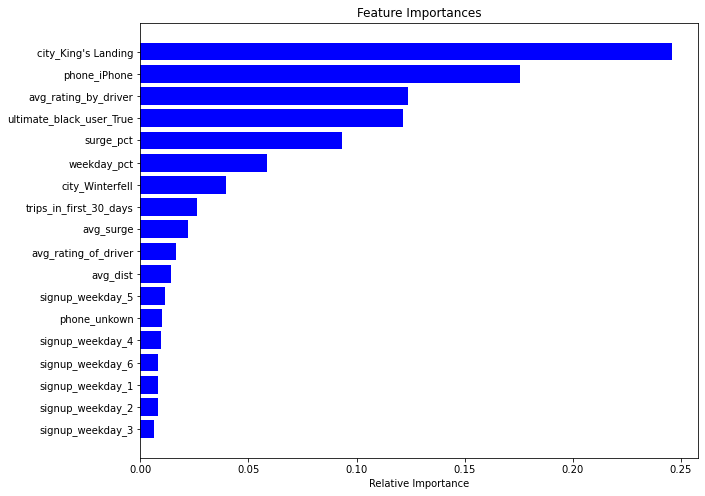

In [337]:
features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the feature importances of the XGBoost model, we can see that the sign up location, the primary device type, the average rating by driver, and wheater the user took an ultimate black in their first 30 days are the most useful features in prediting user retention.<br><br>
Ultimate can look into ways to target specifically on users in King's Landing and iphone users, and offer coupons/discounts for the Ultimate Black service, to achieve a high rider retention.